In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import chocopearl as ch
import os 
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

def centered_array(n, i, a, delta):
    indices = np.arange(n)
    return a + (indices - i) * delta

In [2]:
directory = '/home/pc-igp-173/Documentos/DATA/classified_data/'
file_paths=ch.list_files(directory)[1]

In [3]:
crs = []
i=1
for file_path in file_paths:
    with open(file_path, 'rb') as f:
        print(f'processing {os.path.basename(file_path)}')
        not_end=True
        while not_end:
            try:
                obj = pickle.load(f)
                crs.append(obj)
                #clear_output(wait=True)
                #print(f"CosmicRay: {i}")
                i+=1
            except EOFError as e:
                not_end=False
print(f'Total: {i} Cosmic Rays')

processing trails_jun2023_4_classified.pickle
processing trails_jun2023_8_classified.pickle
processing trails_jun2023_5_classified.pickle
processing trails_jun2023_3_classified.pickle
processing trails_jun2023_2_classified.pickle


IsADirectoryError: [Errno 21] Is a directory: '/home/pc-igp-173/Documentos/DATA/classified_data/with mistakes'

In [4]:
print(f'Total: {i} Cosmic Rays')

Total: 28232 Cosmic Rays


In [5]:
cr=crs[25]

In [6]:
Range_start_ID,Range_end_ID=cr['Range_start_ID'],cr['Range_end_ID']
Range_start,Range_end=cr['Range_start'],cr['Range_end']
nr_ranges=len(cr['Volt_profile'][0])
IDs=np.arange(0,nr_ranges)
delta_r = (Range_end - Range_start) / (Range_end_ID - Range_start_ID)
range_vector = Range_start + delta_r * (np.arange(nr_ranges) - Range_start_ID)
j_size,i_size=cr['Norm_Matrix'].shape
j_mid= int((Range_start_ID+Range_end_ID)/2)
if j_mid-j_size//2 < 0:
    j_min=0
    j_max=j_min+j_size
elif j_mid+j_size//2 > nr_ranges-1:
    j_max=nr_ranges-1
    j_min=j_max-j_size
else:
    j_min=j_mid-j_size//2
    j_max=j_min+j_size
ranges=range_vector[j_min:j_max]


power_profile=10*np.log10(np.sum([cr['Volt_profile'][i]*np.conj(cr['Volt_profile'][i]) for i in range(3)],axis=0).real+1)
for column in range(i_size):
    if (cr['Matrix'][:,column] == power_profile[j_min:j_max]).all():
        break
times=centered_array(n=i_size, i=column, a=datetime.utcfromtimestamp(cr['timestamp']), delta= timedelta(microseconds=400))

# Seleccionamos dos puntos con valores diferentes
x1 = cr['Norm_Matrix'][0, 0]
y1 = cr['Matrix'][0, 0]

x2 = cr['Norm_Matrix'][0, 1]
y2 = cr['Matrix'][0, 1]

# Evitar que x1 == x2 (sería división por cero)
if x1 == x2:
    raise ValueError("Selecciona dos posiciones distintas con valores normalizados diferentes.")

# Resolver el sistema
vmin = (y1 * x2 - y2 * x1) / (x2 - x1)
vmax = (y1 - vmin) / x1 + vmin

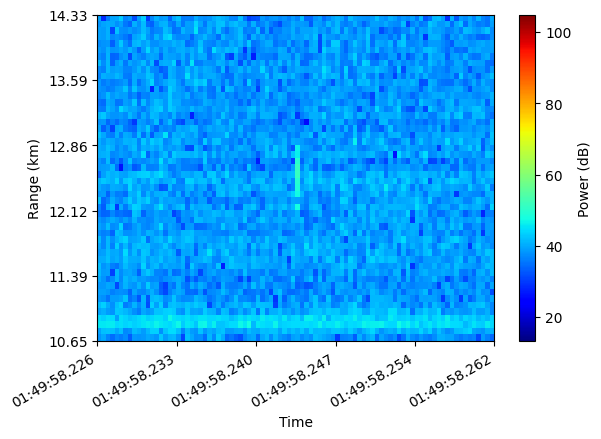

In [15]:

# Convertir lista de datetime a números matplotlib
time_nums = mdates.date2num(times)

fig, ax = plt.subplots()

# Mostrar la matriz con valores reales de tiempo y rango
cax = ax.imshow(
    cr['Matrix'],
    cmap='jet',
    vmin=vmin,
    vmax=vmax,
    aspect='auto',
    extent=[time_nums[0], time_nums[-1], ranges[0], ranges[-1]],
    origin='lower'
)

fig.colorbar(cax, label='Power (dB)')

# Etiquetas de ejes
ax.set_xlabel("Time")
ax.set_ylabel("Range (km)")

# ✅ Personalizar ticks del eje Y (rango)
yticks = np.linspace(ranges[0], ranges[-1], 6)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{r:.2f}" for r in yticks])

# ✅ Personalizar ticks del eje X (tiempo)
# Elegimos 6 tiempos igualmente espaciados
xticks = np.linspace(time_nums[0], time_nums[-1], 6)
ax.set_xticks(xticks)
ax.set_xticklabels([mdates.num2date(t).strftime('%H:%M:%S.%f')[:-3] for t in xticks])  # con milisegundos

# Opcional: rotar etiquetas si están muy juntas
fig.autofmt_xdate()

plt.show()

# Evaluate multiple events

Enter event number:  9013


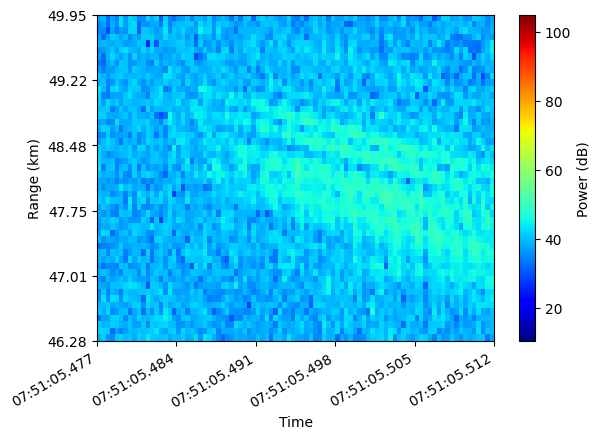

Enter event number:  9011


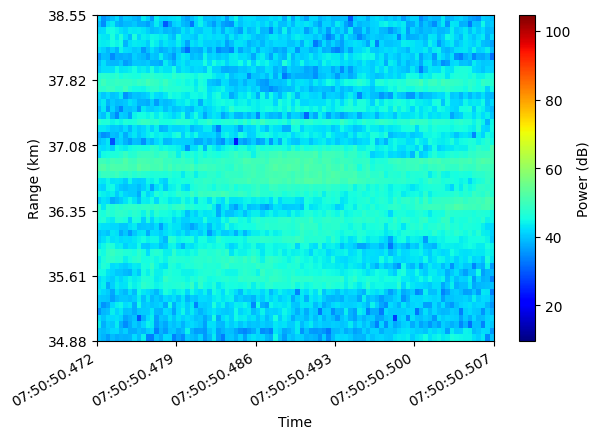

Enter event number:  9014


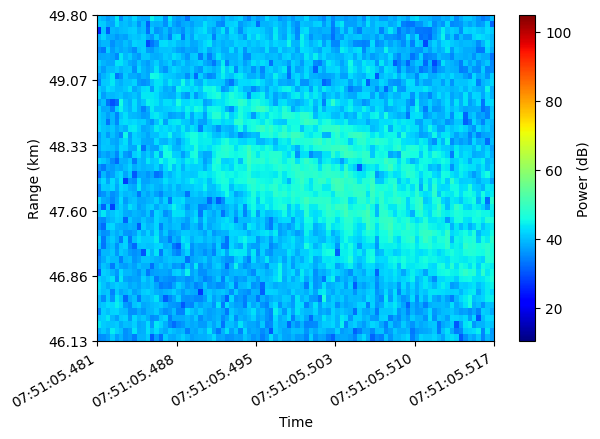

Enter event number:  9016


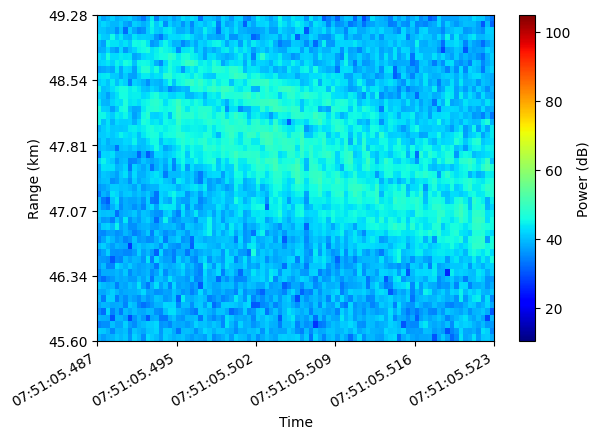

Enter event number:  9020


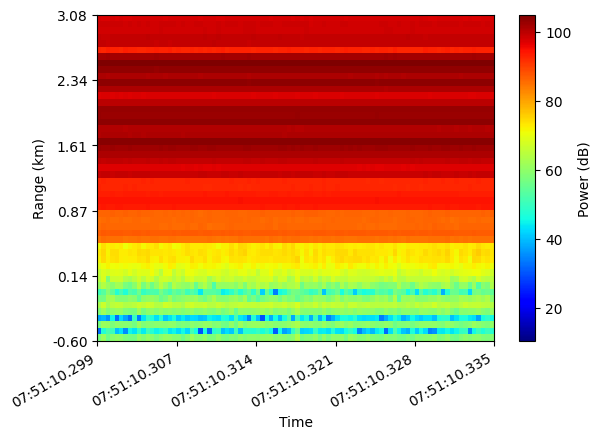

Enter event number:  9019


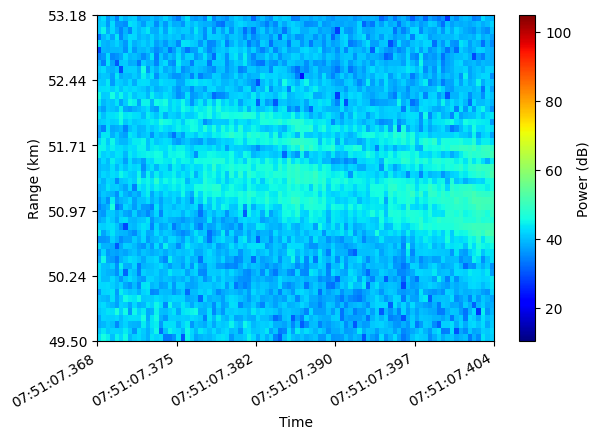

Enter event number:  9021


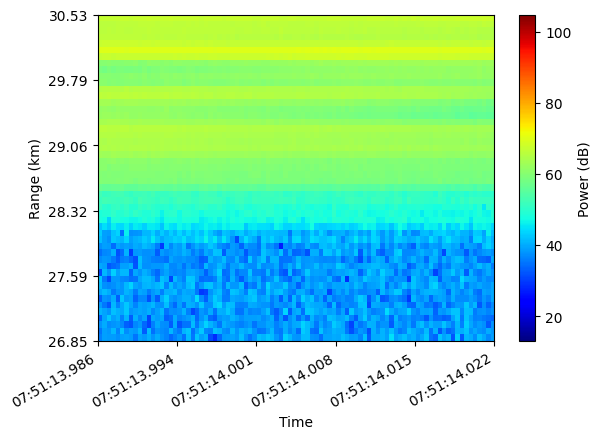

Enter event number:  9022


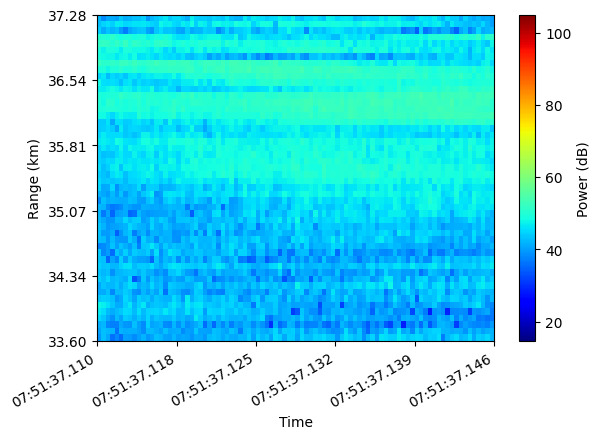

Enter event number:  930


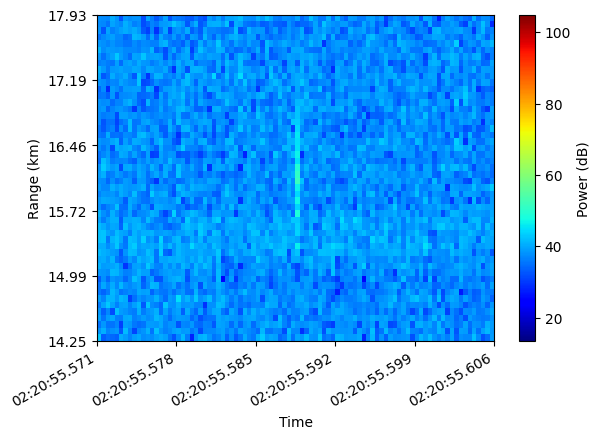

Enter event number:  11


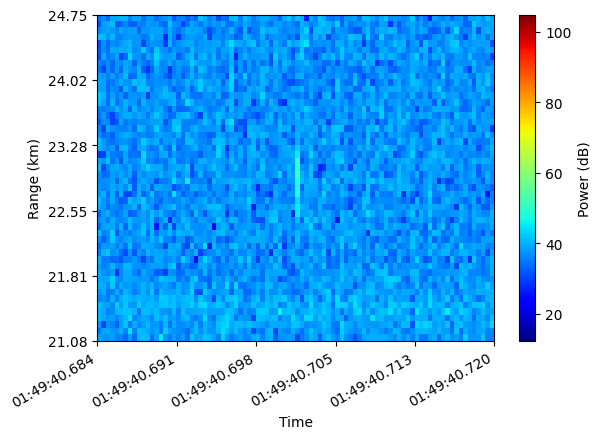

Enter event number:  15


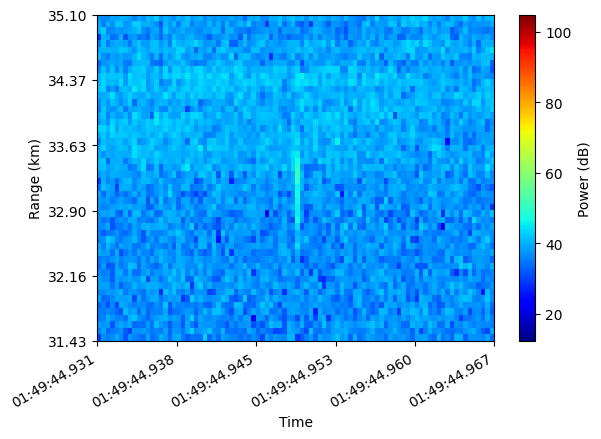

Enter event number:  16


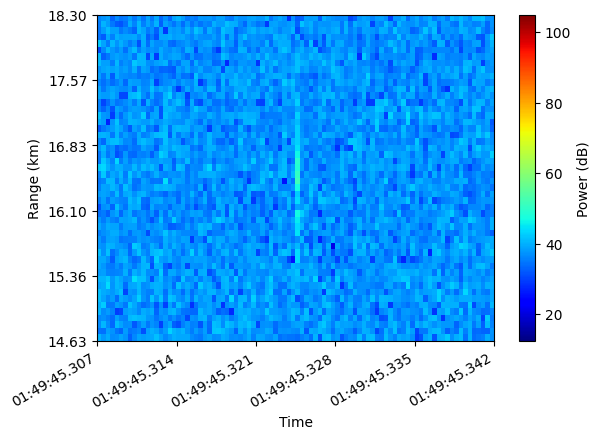

Enter event number:  18


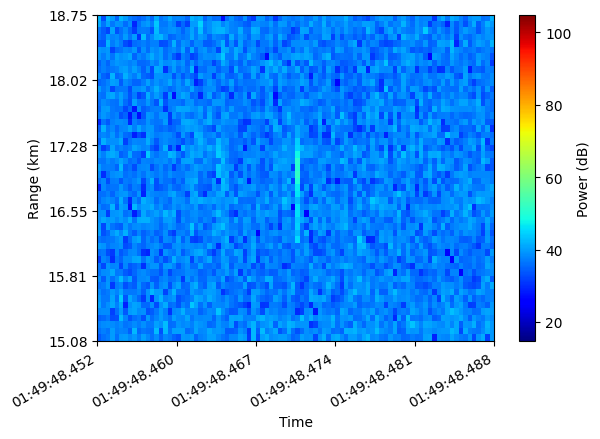

Enter event number:  19


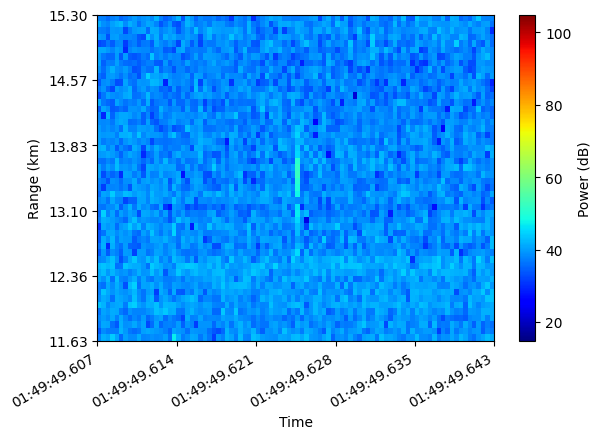

Enter event number:  17


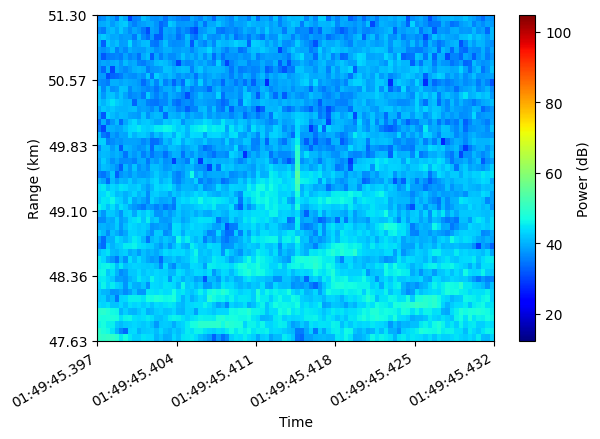

Enter event number:  16


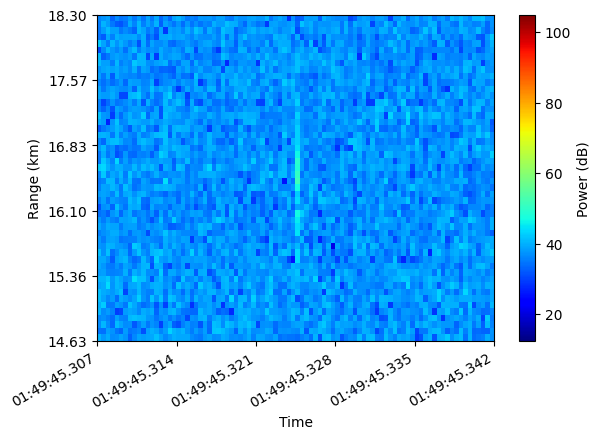

Enter event number:  20


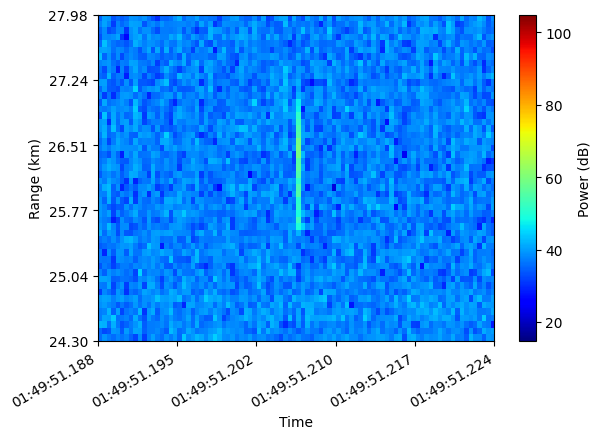

Enter event number:  21


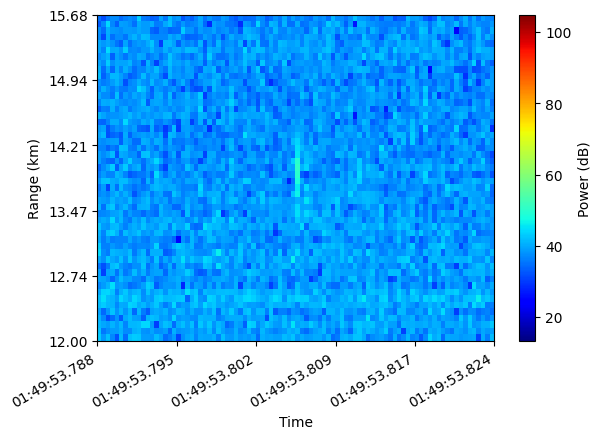

Enter event number:  23


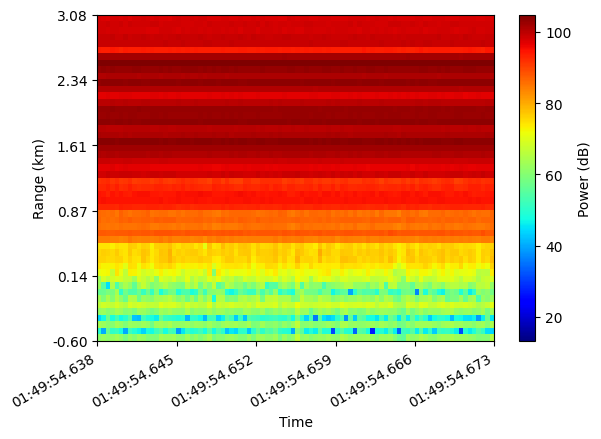

Enter event number:  22


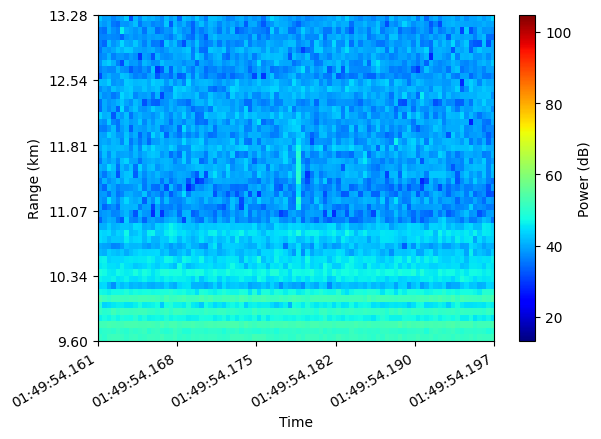

Enter event number:  24


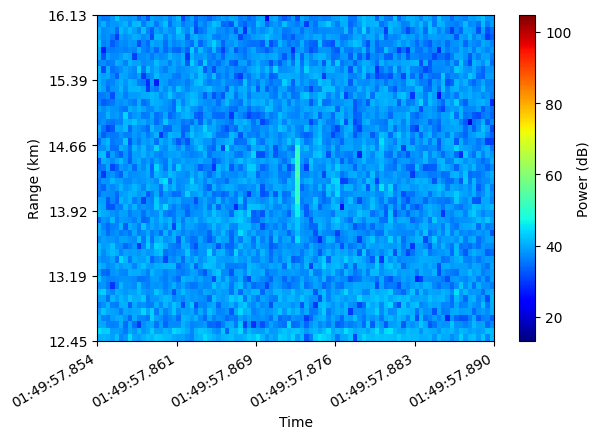

Enter event number:  25


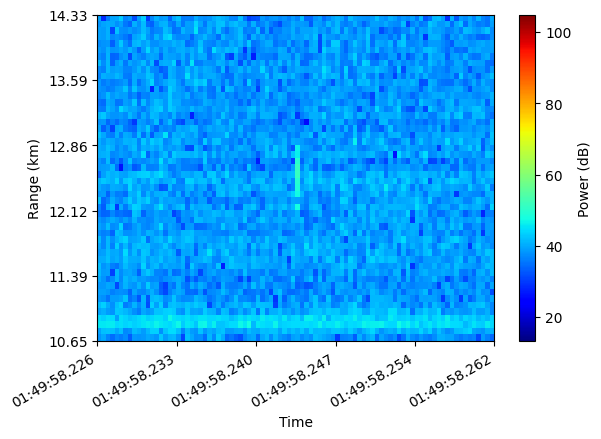

Enter event number:  26


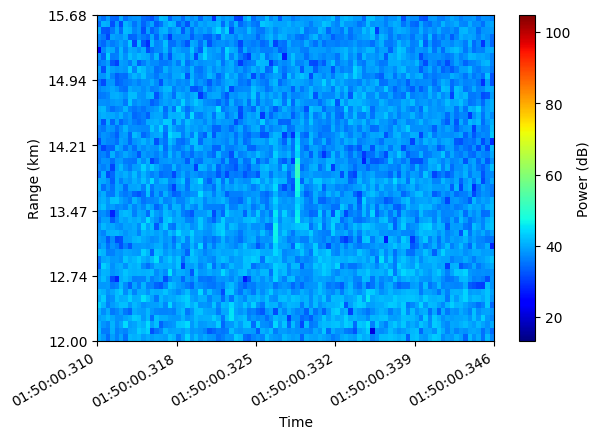

Enter event number:  27


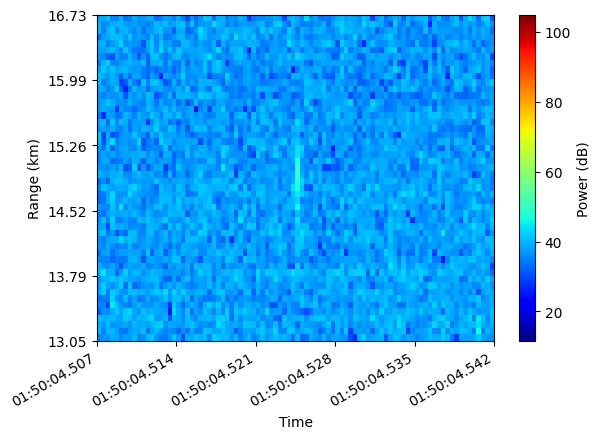

Enter event number:  28


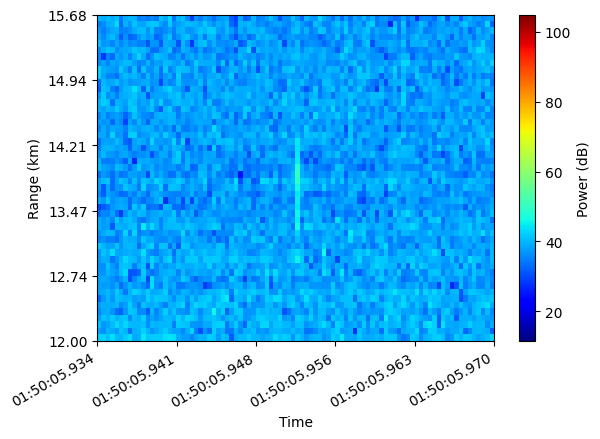

Enter event number:  29


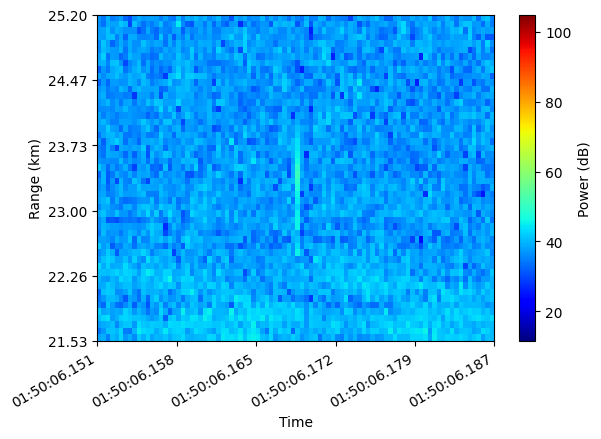

Enter event number:  30


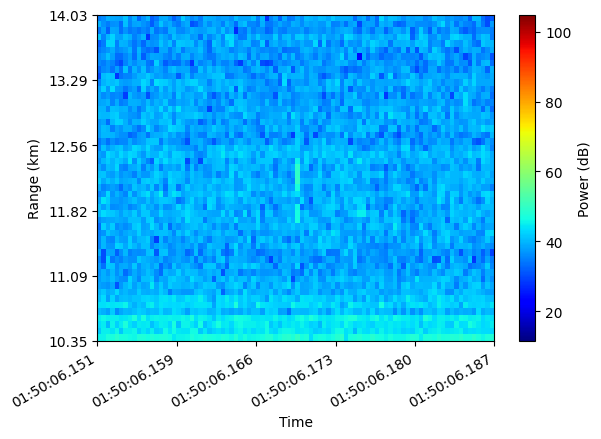

Enter event number:  31


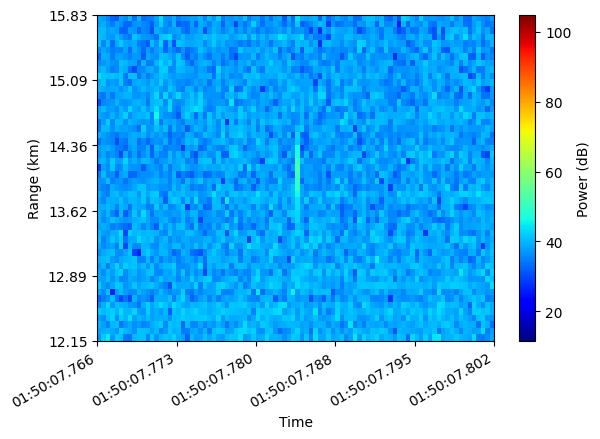

Enter event number:  32


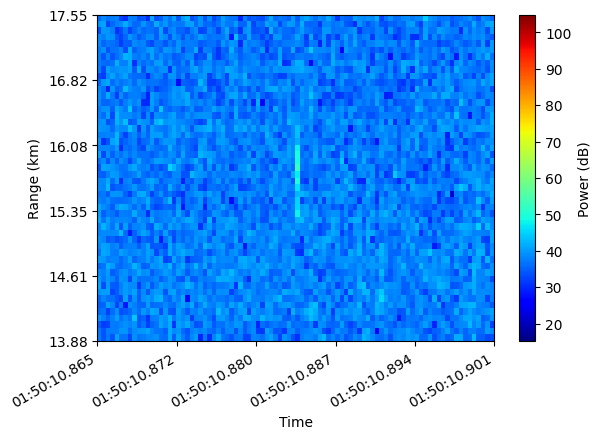

Enter event number:  33


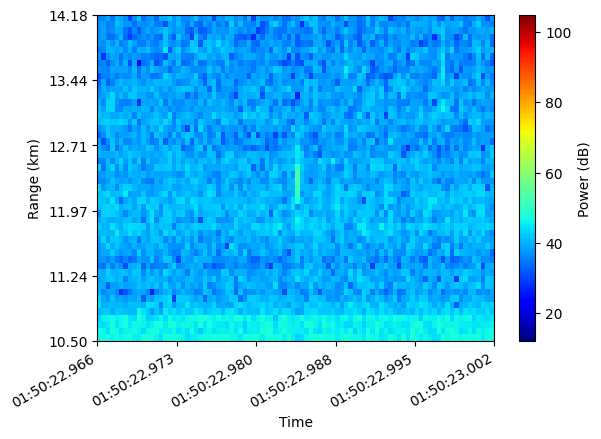

Enter event number:  34


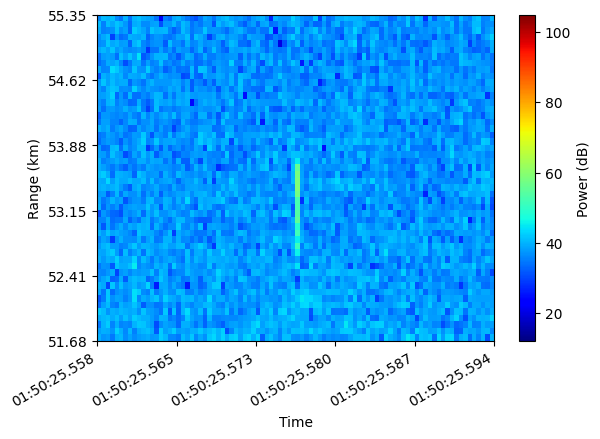

Enter event number:  35


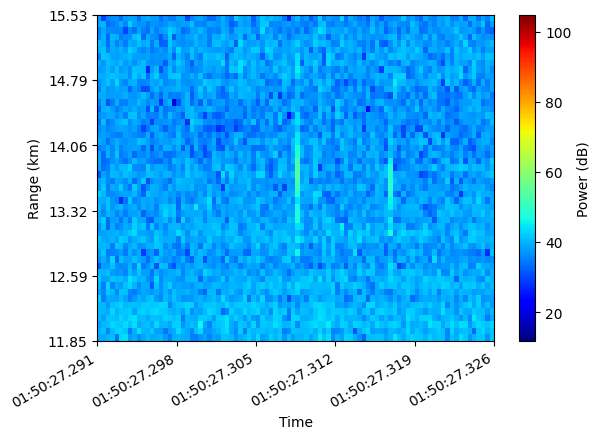

Enter event number:  36


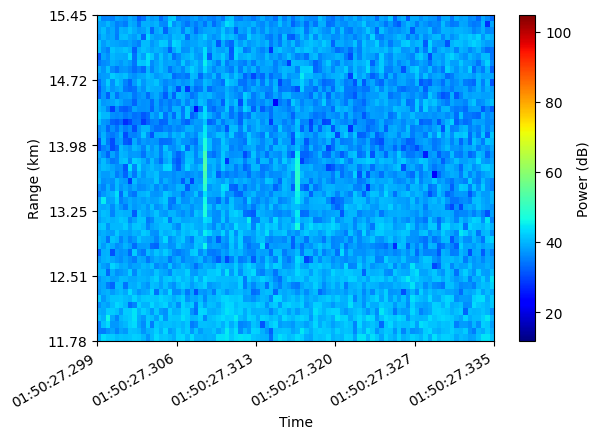

Enter event number:  37


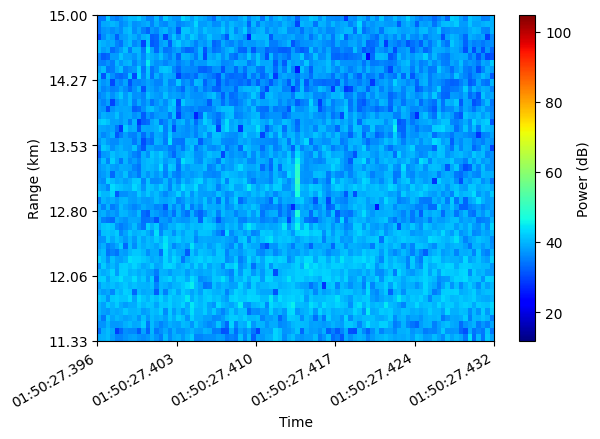

Enter event number:  38


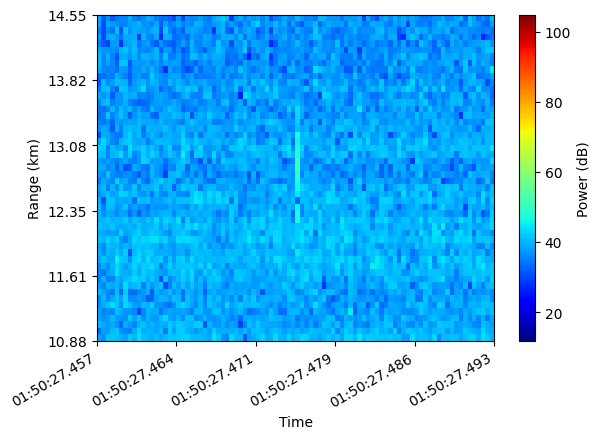

Enter event number:  39


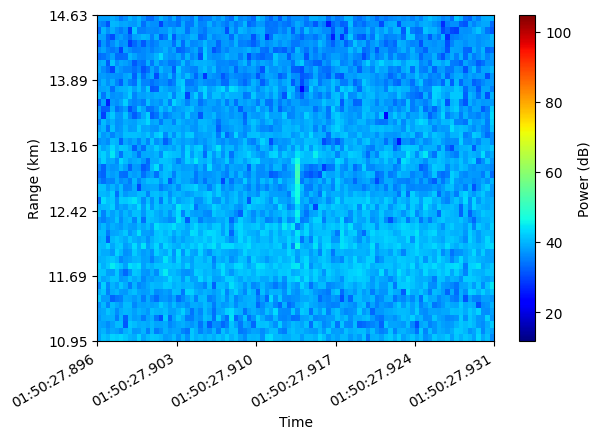

Enter event number:  40


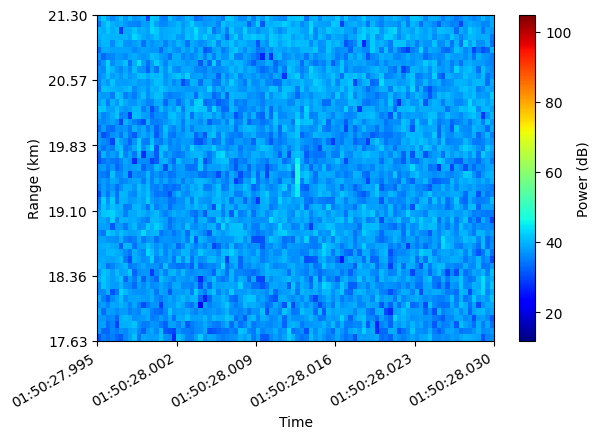

Enter event number:  41


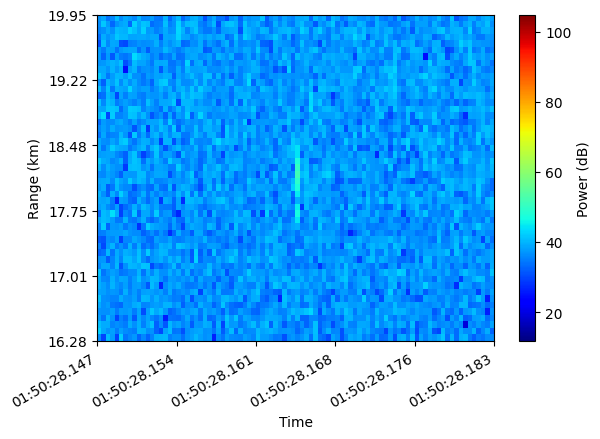

Enter event number:  42


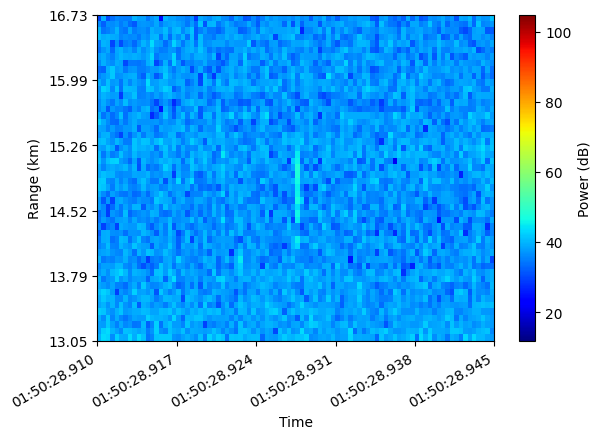

Enter event number:  43


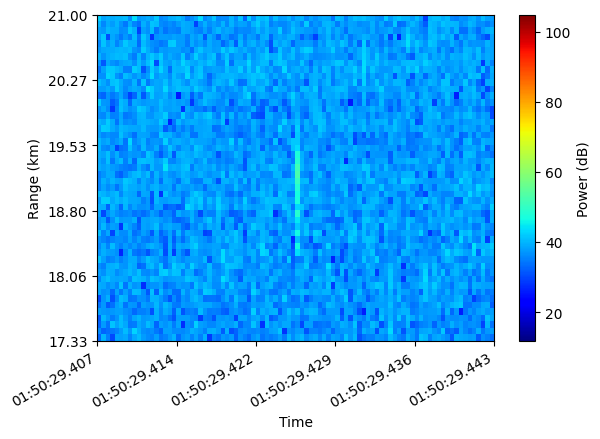

Enter event number:  44


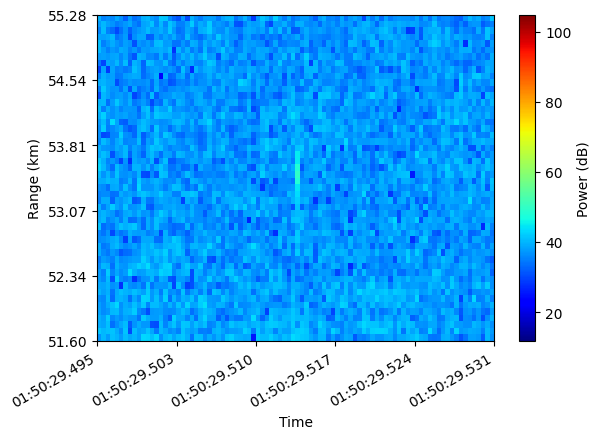

Enter event number:  45


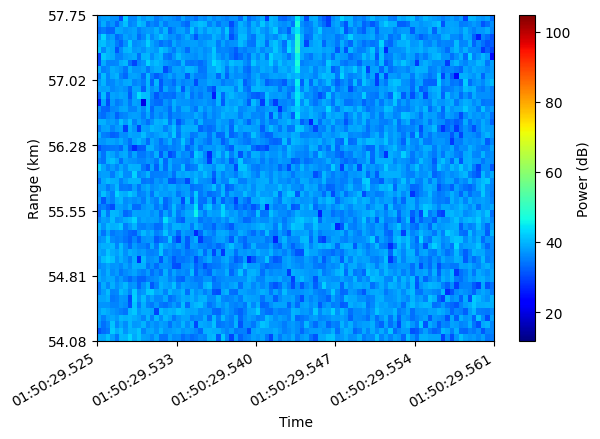

Enter event number:  46


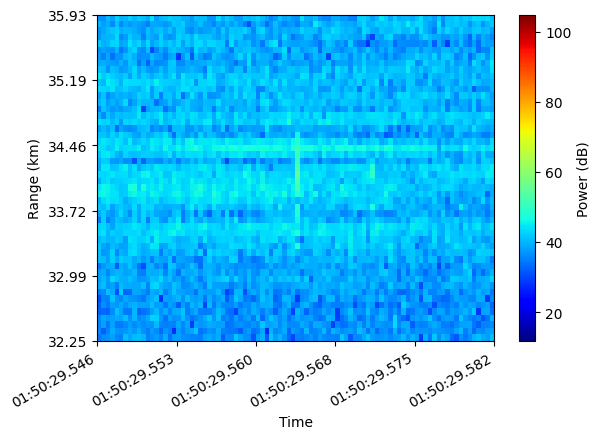

Enter event number:  47


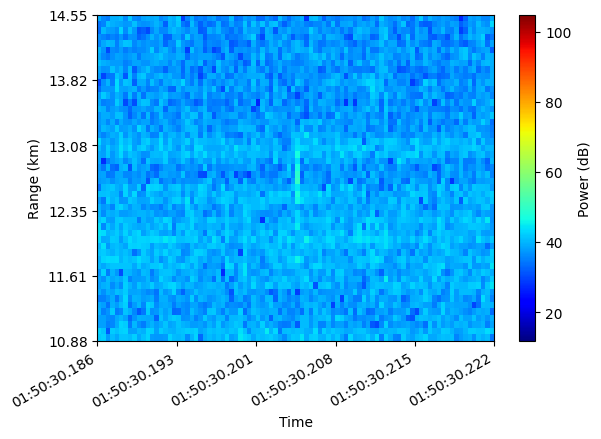

Enter event number:  48


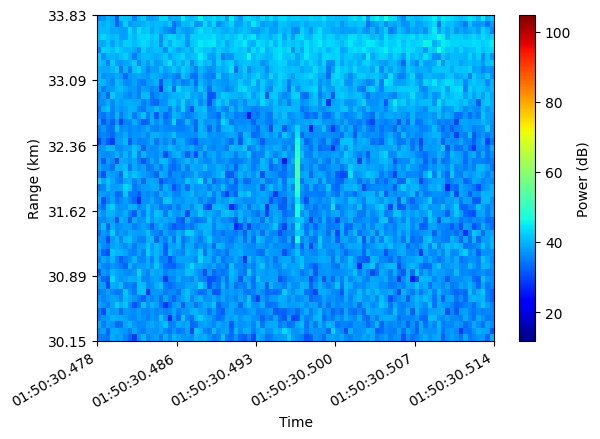

KeyboardInterrupt: Interrupted by user

In [5]:
while True:
    cr=crs[int(input('Enter event number: '))]
    Range_start_ID,Range_end_ID=cr['Range_start_ID'],cr['Range_end_ID']
    Range_start,Range_end=cr['Range_start'],cr['Range_end']
    nr_ranges=len(cr['Volt_profile'][0])
    IDs=np.arange(0,nr_ranges)
    delta_r = (Range_end - Range_start) / (Range_end_ID - Range_start_ID)
    range_vector = Range_start + delta_r * (np.arange(nr_ranges) - Range_start_ID)
    j_size,i_size=cr['Norm_Matrix'].shape
    j_mid= int((Range_start_ID+Range_end_ID)/2)
    if j_mid-j_size//2 < 0:
        j_min=0
        j_max=j_min+j_size
    elif j_mid+j_size//2 > nr_ranges-1:
        j_max=nr_ranges-1
        j_min=j_max-j_size
    else:
        j_min=j_mid-j_size//2
        j_max=j_min+j_size
    ranges=range_vector[j_min:j_max]
    
    
    power_profile=10*np.log10(np.sum([cr['Volt_profile'][i]*np.conj(cr['Volt_profile'][i]) for i in range(3)],axis=0).real+1)
    for column in range(i_size):
        if (cr['Matrix'][:,column] == power_profile[j_min:j_max]).all():
            break
    times=centered_array(n=i_size, i=column, a=datetime.utcfromtimestamp(cr['timestamp']), delta= timedelta(microseconds=400))
    
    # Seleccionamos dos puntos con valores diferentes
    x1 = cr['Norm_Matrix'][0, 0]
    y1 = cr['Matrix'][0, 0]
    
    x2 = cr['Norm_Matrix'][0, 1]
    y2 = cr['Matrix'][0, 1]
    
    # Evitar que x1 == x2 (sería división por cero)
    if x1 == x2:
        raise ValueError("Selecciona dos posiciones distintas con valores normalizados diferentes.")
    
    # Resolver el sistema
    vmin = (y1 * x2 - y2 * x1) / (x2 - x1)
    vmax = (y1 - vmin) / x1 + vmin


    # Convertir lista de datetime a números matplotlib
    time_nums = mdates.date2num(times)
    
    fig, ax = plt.subplots()
    
    # Mostrar la matriz con valores reales de tiempo y rango
    cax = ax.imshow(
        cr['Matrix'],
        cmap='jet',
        vmin=vmin,
        vmax=vmax,
        aspect='auto',
        extent=[time_nums[0], time_nums[-1], ranges[0], ranges[-1]],
        origin='lower'
    )
    
    fig.colorbar(cax, label='Power (dB)')
    
    # Etiquetas de ejes
    ax.set_xlabel("Time")
    ax.set_ylabel("Range (km)")
    
    # ✅ Personalizar ticks del eje Y (rango)
    yticks = np.linspace(ranges[0], ranges[-1], 6)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f"{r:.2f}" for r in yticks])
    
    # ✅ Personalizar ticks del eje X (tiempo)
    # Elegimos 6 tiempos igualmente espaciados
    xticks = np.linspace(time_nums[0], time_nums[-1], 6)
    ax.set_xticks(xticks)
    ax.set_xticklabels([mdates.num2date(t).strftime('%H:%M:%S.%f')[:-3] for t in xticks])  # con milisegundos
    
    # Opcional: rotar etiquetas si están muy juntas
    fig.autofmt_xdate()
    
    plt.show()